In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dftrain =pd.read_csv('train.csv')
dftest=pd.read_csv("test.csv")

In [3]:
dftrain.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,1/1/2013,1,AUTOMOTIVE,0.0,0
1,1,1/1/2013,1,BABY CARE,0.0,0
2,2,1/1/2013,1,BEAUTY,0.0,0
3,3,1/1/2013,1,BEVERAGES,0.0,0
4,4,1/1/2013,1,BOOKS,0.0,0


In [4]:
dftrain.describe()

,id,store_nbr,sales,onpromotion
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2.749256e+01,2.445326e+02,1.147634e-01
std,3.026977e+05,1.558408e+01,8.065892e+02,2.377814e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,5.242870e+05,2.700000e+01,1.000000e+00,0.000000e+00
75%,7.864305e+05,4.100000e+01,1.200000e+02,0.000000e+00
max,1.048574e+06,5.400000e+01,4.627100e+04,1.960000e+02


In [5]:
dftest.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
dftrain.drop(["id"],axis=1,inplace=True)
dftest.drop(["id"],axis=1,inplace=True)

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         1048575 non-null  object 
 1   store_nbr    1048575 non-null  int64  
 2   family       1048575 non-null  object 
 3   sales        1048575 non-null  float64
 4   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ MB


In [8]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         28512 non-null  object
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 891.1+ KB


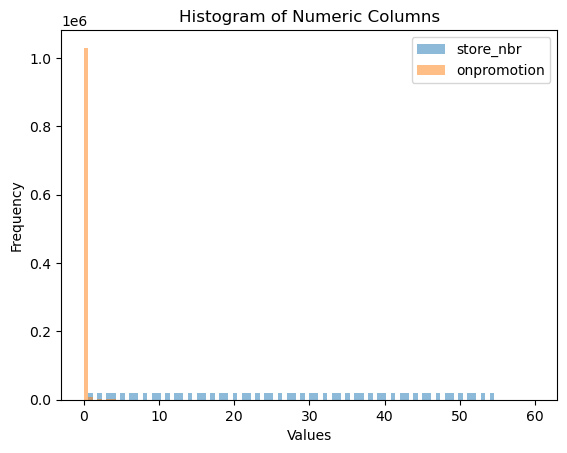

In [9]:
#check distribution of numeric values

# Select the numeric columns you want to plot
dftrainnosale=dftrain.drop(["sales"],axis=1)
numeric_columns = dftrainnosale.select_dtypes(include="number").columns

# Plot histogram for each numeric column
for column in numeric_columns:
    plt.hist(dftrainnosale[column], bins=100, alpha=0.5, label=column, range=(0,60))

# Add labels and title to the plot
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Columns")

# Add legend to distinguish the columns
plt.legend()

In [58]:
#now is the time for cheking the outliners for numeric values

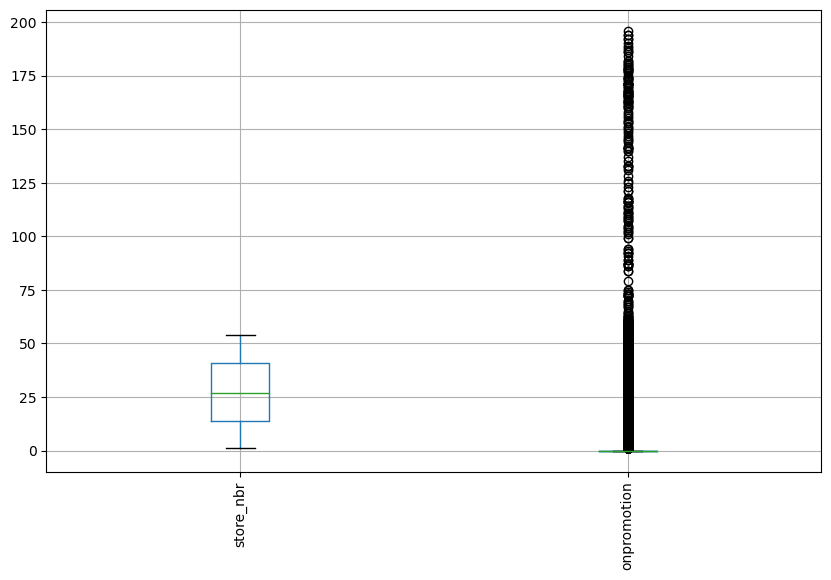

In [10]:
plt.figure(figsize=(10,6))
dftrain.boxplot(column=['store_nbr', 'onpromotion'])
plt.xticks(rotation=90)
plt.show()

In [11]:
#onpromotion has a lot of outliners so now i want to count them


#Calculate IQR
Q1 = dftrain["onpromotion"].quantile(0.25)
Q3 = dftrain["onpromotion"].quantile(0.75)
IQR = Q3 - Q1

#   outliers using IQR method
outliers_iqr = (dftrain["onpromotion"]< Q1 - 1.5 * IQR) | (dftrain["onpromotion"]> Q3 + 1.5 * IQR)

# Step 5: Count the number of outliers
num_outliers_iqr = outliers_iqr.sum()


print("Number of outliers using IQR method:", num_outliers_iqr)

Number of outliers using IQR method: 18493


In [12]:
#keep the Outliners

In [12]:
# Convert the date
# Convert the time column to datetime if necessary
dftrain["date"] = pd.to_datetime(dftrain["date"])
dftest["date"] = pd.to_datetime(dftest["date"])

In [13]:
dftrain.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [14]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1048575 non-null  datetime64[ns]
 1   store_nbr    1048575 non-null  int64         
 2   family       1048575 non-null  object        
 3   sales        1048575 non-null  float64       
 4   onpromotion  1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 40.0+ MB


In [15]:
dumtrain=pd.get_dummies(dftrain,columns = ["family"]
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ["family"]
               ,drop_first = True)

In [16]:
dumtrain.info()
dumtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   date                               1048575 non-null  datetime64[ns]
 1   store_nbr                          1048575 non-null  int64         
 2   sales                              1048575 non-null  float64       
 3   onpromotion                        1048575 non-null  int64         
 4   family_BABY CARE                   1048575 non-null  uint8         
 5   family_BEAUTY                      1048575 non-null  uint8         
 6   family_BEVERAGES                   1048575 non-null  uint8         
 7   family_BOOKS                       1048575 non-null  uint8         
 8   family_BREAD/BAKERY                1048575 non-null  uint8         
 9   family_CELEBRATION                 1048575 non-null  uint8         
 10  family

In [19]:
#normalization


from sklearn.preprocessing import StandardScaler


# Create a new DataFrame with the selected columns
dumtrain_coltobescaled = dumtrain[["store_nbr","onpromotion"]]
dumtrain_colnottobescaled=dumtrain.drop(["store_nbr","onpromotion"],axis=1)
# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dumtrain_scaledonlytwocolumns = scaler.fit_transform(dumtrain_coltobescaled)
dumtrain_dataframescalednotwocolumns=pd.DataFrame(dumtrain_scaledonlytwocolumns,columns=["store_nbr","onpromotion"])



# Concatenate the column to the DataFrame
df_concatenated_train = pd.concat([dumtrain_dataframescalednotwocolumns, dumtrain_colnottobescaled], axis=1)

finaltrain=df_concatenated_train



# Create a new DataFrame with the selected columns
dumtest_coltobescaled = dumtest[["store_nbr","onpromotion"]]
dumtest_colnottobescaled=dumtest.drop(["store_nbr","onpromotion"],axis=1)
# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dumtest_scaledonlytwocolumns = scaler.fit_transform(dumtest_coltobescaled)
dumtest_dataframescalednotwocolumns=pd.DataFrame(dumtest_scaledonlytwocolumns,columns=["store_nbr","onpromotion"])



# Concatenate the column to the DataFrame
df_concatenated_test = pd.concat([dumtest_dataframescalednotwocolumns, dumtest_colnottobescaled], axis=1)

finaltest=df_concatenated_test


In [20]:
finaltrain.info()
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   store_nbr                          1048575 non-null  float64       
 1   onpromotion                        1048575 non-null  float64       
 2   date                               1048575 non-null  datetime64[ns]
 3   sales                              1048575 non-null  float64       
 4   family_BABY CARE                   1048575 non-null  uint8         
 5   family_BEAUTY                      1048575 non-null  uint8         
 6   family_BEVERAGES                   1048575 non-null  uint8         
 7   family_BOOKS                       1048575 non-null  uint8         
 8   family_BREAD/BAKERY                1048575 non-null  uint8         
 9   family_CELEBRATION                 1048575 non-null  uint8         
 10  family

In [21]:
finaltrain.head()

,store_nbr,onpromotion,date,sales,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-1.699976,-0.048264,2013-01-01,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.699976,-0.048264,2013-01-01,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.699976,-0.048264,2013-01-01,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.699976,-0.048264,2013-01-01,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.699976,-0.048264,2013-01-01,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
finaltest.head()

,store_nbr,onpromotion,date,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-1.700267,-0.336759,2017-08-16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.700267,-0.336759,2017-08-16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.700267,-0.240064,2017-08-16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.700267,0.630191,2017-08-16,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.700267,-0.336759,2017-08-16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Convert 'timestamp' column to pandas datetime type
finaltrain['date'] = pd.to_datetime(finaltrain['date'])

# Extract day, month, and year into separate columns
finaltrain['day'] = finaltrain['date'].dt.day
finaltrain['month'] = finaltrain['date'].dt.month
finaltrain['year'] = finaltrain['date'].dt.year

# Convert 'timestamp' column to pandas datetime type
finaltest['date'] = pd.to_datetime(finaltest['date'])

# Extract day, month, and year into separate columns
finaltest['day'] = finaltest['date'].dt.day
finaltest['month'] = finaltest['date'].dt.month
finaltest['year'] = finaltest['date'].dt.year

finaltrain.drop(["date"],axis=1,inplace=True)
finaltest.drop(["date"],axis=1,inplace=True)



In [28]:
finaltrain.info()
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   store_nbr                          1048575 non-null  float64
 1   onpromotion                        1048575 non-null  float64
 2   sales                              1048575 non-null  float64
 3   family_BABY CARE                   1048575 non-null  uint8  
 4   family_BEAUTY                      1048575 non-null  uint8  
 5   family_BEVERAGES                   1048575 non-null  uint8  
 6   family_BOOKS                       1048575 non-null  uint8  
 7   family_BREAD/BAKERY                1048575 non-null  uint8  
 8   family_CELEBRATION                 1048575 non-null  uint8  
 9   family_CLEANING                    1048575 non-null  uint8  
 10  family_DAIRY                       1048575 non-null  uint8  
 11  family_DELI             

In [29]:
X=finaltrain.drop("sales",axis=1)
y= finaltrain['sales']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regression models
linear_regression = LinearRegression()
ridge_regression = Ridge(alpha=0.5)  # Set the alpha parameter for Ridge regression
lasso_regression = Lasso(alpha=0.1)  # Set the alpha parameter for Lasso regression
decision_tree_regression = DecisionTreeRegressor(max_depth=5)  # Set the max_depth parameter for Decision Tree regression
random_forest_regression = RandomForestRegressor(n_estimators=100,max_depth=11)  # Set the n_estimators parameter for Random Forest regression

linear_regression.fit(X,y)
prediction0lg0model=linear_regression.predict(X_test)
print("Linear regression Mean Square error:",mean_squared_error(prediction0lg0model,y_test))
      
ridge_regression.fit(X,y)
prediction0ridge0=ridge_regression.predict(X_test)
print("ridgi regression Mean Square error:",mean_squared_error(prediction0ridge0,y_test))   
      
lasso_regression .fit(X,y)
prediction0Lasso0=lasso_regression .predict(X_test)
print("Lasso regression Mean Square error:",mean_squared_error(prediction0Lasso0,y_test)) 
      
decision_tree_regression.fit(X,y)
prediction0dtr0=decision_tree_regression.predict(X_test)
print("dtr regression Mean Square error:",mean_squared_error(prediction0dtr0,y_test))
      

random_forest_regression.fit(X,y)
prediction0rf0=random_forest_regression.predict(X_test)
print("rf0 regression Mean Square error:",mean_squared_error(prediction0rf0,y_test))

Linear regression Mean Square error: 323659.62882003427
ridgi regression Mean Square error: 323659.54005740705
Lasso regression Mean Square error: 323666.48035727174
dtr regression Mean Square error: 191801.53255005903
rf0 regression Mean Square error: 87124.79102556572


In [30]:
predictiontestcv=random_forest_regression.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('RandomForesrt.csv')